<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.482467,40.606887,87.968996,73.875799,-0.000019,237.934130,237.934044,0.000087
1,0.0,1.0,30.271721,76.217705,89.056058,60.635410,-0.000076,266.180818,266.180551,0.000266
2,0.0,2.0,57.636629,80.554003,74.372652,84.108394,-0.000249,306.671429,306.671730,-0.000301
3,0.0,3.0,98.336042,45.102342,86.579777,23.017152,0.000530,263.035843,263.035530,0.000313
4,0.0,4.0,55.431583,23.942438,66.855134,30.036015,-0.001367,186.263803,186.265231,-0.001428
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,87.880816,90.329907,61.788916,63.789506,0.000113,313.789259,313.789055,0.000204
29996,999.0,26.0,56.587838,78.414789,98.319501,88.668510,0.000008,331.990646,331.991177,-0.000531
29997,999.0,27.0,95.468060,31.762488,47.270563,48.733616,-0.000825,233.233901,233.234217,-0.000316
29998,999.0,28.0,64.145306,65.402460,31.925048,20.675052,-0.000008,192.147858,192.147245,0.000614


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.482467  40.606887  87.968996  73.875799 -0.000019  237.934130   
      1.0    30.271721  76.217705  89.056058  60.635410 -0.000076  266.180818   
      2.0    57.636629  80.554003  74.372652  84.108394 -0.000249  306.671429   
      3.0    98.336042  45.102342  86.579777  23.017152  0.000530  263.035843   
      4.0    55.431583  23.942438  66.855134  30.036015 -0.001367  186.263803   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   87.880816  90.329907  61.788916  63.789506  0.000113  313.789259   
      26.0   56.587838  78.414789  98.319501  88.668510  0.000008  331.990646   
      27.0   95.468060  31.762488  47.270563  48.733616 -0.000825  233.233901   
      28.0   64.145306  65.402460  31.925048  20.675052 -0.000008  192.147858   
      29.0   74.923834  21.256702  64.953725  61.830045  0.004052  232.968358   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.934044  0.000087  
      1.0    266.180551  0.000266  
      2.0    306.671730 -0.000301  
      3.0    263.035530  0.000313  
      4.0    186.265231 -0.001428  
...                 ...       ...  
999.0 25.0   313.789055  0.000204  
      26.0   331.991177 -0.000531  
      27.0   233.234217 -0.000316  
      28.0   192.147245  0.000614  
      29.0   232.964122  0.004236  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.482467  40.606887  87.968996  73.875799 -0.000019  237.934130   
      1.0    30.271721  76.217705  89.056058  60.635410 -0.000076  266.180818   
      2.0    57.636629  80.554003  74.372652  84.108394 -0.000249  306.671429   
      3.0    98.336042  45.102342  86.579777  23.017152  0.000530  263.035843   
      4.0    55.431583  23.942438  66.855134  30.036015 -0.001367  186.263803   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   87.880816  90.329907  61.788916  63.789506  0.000113  313.789259   
      26.0   56.587838  78.414789  98.319501  88.668510  0.000008  331.990646   
      27.0   95.468060  31.762488  47.270563  48.733616 -0.000825  233.233901   
      28.0   64.145306  65.402460  31.925048  20.675052 -0.000008  192.147858   
      29.0   74.923834  21.256702  64.953725  61.830045  0.004052  232.968358   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.934044  0.000087  
      1.0    266.180551  0.000266  
      2.0    306.671730 -0.000301  
      3.0    263.035530  0.000313  
      4.0    186.265231 -0.001428  
...                 ...       ...  
999.0 25.0   313.789055  0.000204  
      26.0   331.991177 -0.000531  
      27.0   233.234217 -0.000316  
      28.0   192.147245  0.000614  
      29.0   232.964122  0.004236  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.482467,40.606887,87.968996,73.875799,-0.000019,237.934130,237.934044,0.000087
1,0.0,1.0,30.271721,76.217705,89.056058,60.635410,-0.000076,266.180818,266.180551,0.000266
2,0.0,2.0,57.636629,80.554003,74.372652,84.108394,-0.000249,306.671429,306.671730,-0.000301
3,0.0,3.0,98.336042,45.102342,86.579777,23.017152,0.000530,263.035843,263.035530,0.000313
4,0.0,4.0,55.431583,23.942438,66.855134,30.036015,-0.001367,186.263803,186.265231,-0.001428
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,87.880816,90.329907,61.788916,63.789506,0.000113,313.789259,313.789055,0.000204
29996,999.0,26.0,56.587838,78.414789,98.319501,88.668510,0.000008,331.990646,331.991177,-0.000531
29997,999.0,27.0,95.468060,31.762488,47.270563,48.733616,-0.000825,233.233901,233.234217,-0.000316
29998,999.0,28.0,64.145306,65.402460,31.925048,20.675052,-0.000008,192.147858,192.147245,0.000614


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.482467  40.606887  87.968996  73.875799 -0.000019  237.934130   
      1.0    30.271721  76.217705  89.056058  60.635410 -0.000076  266.180818   
      2.0    57.636629  80.554003  74.372652  84.108394 -0.000249  306.671429   
      3.0    98.336042  45.102342  86.579777  23.017152  0.000530  263.035843   
      4.0    55.431583  23.942438  66.855134  30.036015 -0.001367  186.263803   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   87.880816  90.329907  61.788916  63.789506  0.000113  313.789259   
      26.0   56.587838  78.414789  98.319501  88.668510  0.000008  331.990646   
      27.0   95.468060  31.762488  47.270563  48.733616 -0.000825  233.233901   
      28.0   64.145306  65.402460  31.925048  20.675052 -0.000008  192.147858   
      29.0   74.923834  21.256702  64.953725  61.830045  0.004052  232.968358   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.934044  0.000087  
      1.0    266.180551  0.000266  
      2.0    306.671730 -0.000301  
      3.0    263.035530  0.000313  
      4.0    186.265231 -0.001428  
...                 ...       ...  
999.0 25.0   313.789055  0.000204  
      26.0   331.991177 -0.000531  
      27.0   233.234217 -0.000316  
      28.0   192.147245  0.000614  
      29.0   232.964122  0.004236  

[30000 rows x 8 columns]

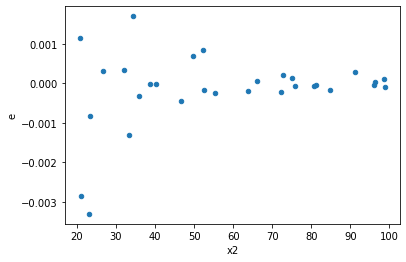

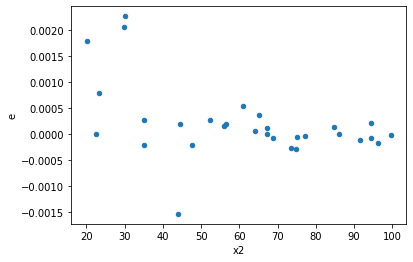

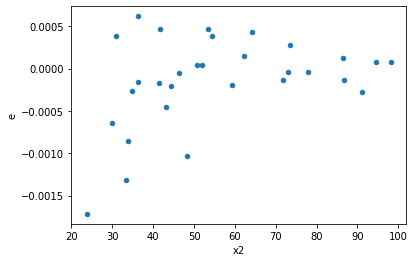

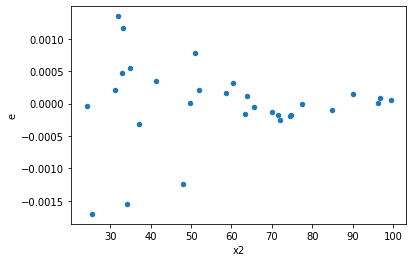

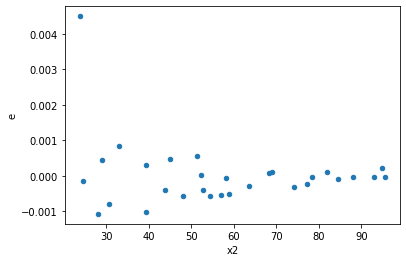

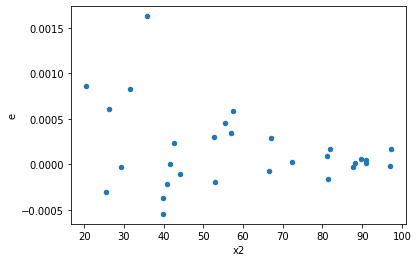

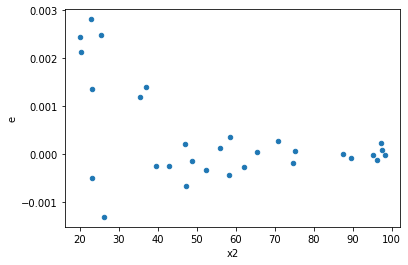

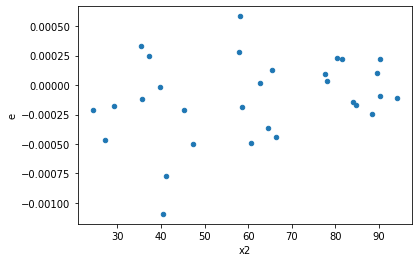

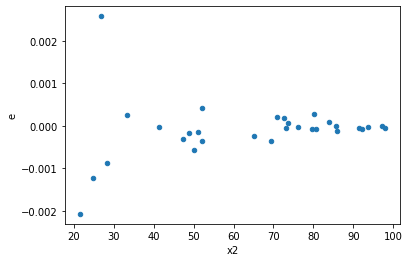

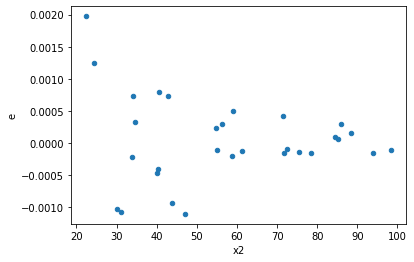

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,17.0,5.0,6.1146416819977334e-06,4.570972263943614e-06,3.596848048233961e-07,9.141944527887228e-07,2.5416543610664593,0.306992719629658,0.846503640185171,0.153496359814829,Reject005=1 : Homoscedasticity
2.0,14.0,8.0,2.3545672619658658e-06,2.6329877965505988e-06,1.6818337585470469e-07,3.2912347456882484e-07,1.956932264537001,0.341975857263461,0.8290120713682695,0.1709879286317305,Reject005=1 : Homoscedasticity
3.0,14.0,8.0,8.145587212142389e-07,2.3812023069549863e-06,5.818276580101706e-08,2.976502883693733e-07,5.115781009574664,0.026017823024951925,0.986991088487524,0.013008911512475962,Reject005=0 : Heteroscedasticity
5.0,11.0,11.0,1.2820279746653414e-06,7.236691722919008e-06,1.1654799769684922e-07,6.578810657199098e-07,5.644722163576861,0.00784686876661933,0.9960765656166903,0.003923434383309665,Reject005=0 : Heteroscedasticity
6.0,14.0,8.0,7.4871742645311615e-06,7.101402495868623e-06,5.347981617522259e-07,8.876753119835778e-07,1.6598323918600928,0.4770943520545523,0.7614528239727238,0.23854717602727615,Reject005=1 : Homoscedasticity
7.0,8.0,14.0,3.0207428218279823e-06,9.466778013083717e-06,3.775928527284978e-07,6.761984295059798e-07,1.7908136359566893,0.3251660388589228,0.8374169805705386,0.1625830194294614,Reject005=1 : Homoscedasticity
9.0,4.0,18.0,3.6276452906953105e-07,2.077664452117597e-05,9.069113226738276e-08,1.1542580289542206e-06,12.727352720122028,8.661344907379132e-05,0.9999566932754631,4.330672453689566e-05,Reject005=0 : Heteroscedasticity
13.0,8.0,14.0,2.0957766275111365e-06,5.127627433637261e-06,2.6197207843889206e-07,3.662591024026615e-07,1.3980845003987536,0.5573604875922733,0.7213197562038633,0.27868024379613665,Reject005=1 : Homoscedasticity
14.0,5.0,17.0,2.109996146031952e-06,1.9090781708027178e-05,4.2199922920639043e-07,1.1229871592957163e-06,2.6611118731368304,0.11863016217691635,0.9406849189115418,0.05931508108845818,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,8.0,7.416759507529597e-06,2.842038514678488e-07,5.297685362521141e-07,3.55254814334811e-08,0.06705849631012196,2.5347721198610275e-05,Reject005=0 : Heteroscedasticity
1.0,17.0,5.0,6.1146416819977334e-06,4.570972263943614e-06,3.596848048233961e-07,9.141944527887228e-07,2.5416543610664593,0.306992719629658,Reject005=1 : Homoscedasticity
2.0,14.0,8.0,2.3545672619658658e-06,2.6329877965505988e-06,1.6818337585470469e-07,3.2912347456882484e-07,1.956932264537001,0.341975857263461,Reject005=1 : Homoscedasticity
3.0,14.0,8.0,8.145587212142389e-07,2.3812023069549863e-06,5.818276580101706e-08,2.976502883693733e-07,5.115781009574664,0.026017823024951925,Reject005=0 : Heteroscedasticity
4.0,16.0,6.0,3.1851005958742413e-06,2.6867200505399756e-07,1.9906878724214008e-07,4.477866750899959e-08,0.22494067567977113,0.015673408314850732,Reject005=0 : Heteroscedasticity
5.0,11.0,11.0,1.2820279746653414e-06,7.236691722919008e-06,1.1654799769684922e-07,6.578810657199098e-07,5.644722163576861,0.00784686876661933,Reject005=0 : Heteroscedasticity
6.0,14.0,8.0,7.4871742645311615e-06,7.101402495868623e-06,5.347981617522259e-07,8.876753119835778e-07,1.6598323918600928,0.4770943520545523,Reject005=1 : Homoscedasticity
7.0,8.0,14.0,3.0207428218279823e-06,9.466778013083717e-06,3.775928527284978e-07,6.761984295059798e-07,1.7908136359566893,0.3251660388589228,Reject005=1 : Homoscedasticity
8.0,10.0,12.0,2.2040227199918276e-06,9.862207431921328e-07,2.2040227199918277e-07,8.218506193267773e-08,0.3728866367266054,0.12786144139972427,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    594
Reject005=1 : Homoscedasticity      406
Name: Result_test, dtype: int64